In [1]:
#Same as 01 except only freq data

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
def get_sens_spec(y,pred):
    tp = np.sum(np.logical_and(y,pred==y))
    tn = np.sum(np.logical_and(1-y,pred==y))
    fp = np.sum(np.logical_and(pred,pred!=y))
    fn = np.sum(np.logical_and(1-pred,pred!=y))
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    acc = (tp+tn)/(tp+tn+fp+fn)
    return [sens,spec,acc]

In [3]:
table = pd.read_csv("../Data/OHE_Eth.csv")
y = table["OverallPoF"].to_numpy()
X = table.iloc[:,1:18].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
rs = 646
tr,t = train_test_split([a for a in range(X.shape[0])],train_size=0.7,random_state=rs)

In [5]:
class autoenc:
    def __init__(self,maxn,minn,dropn):
        self._build_enc(maxn,minn,dropn)
        self._build_dec(maxn,minn,dropn)
        self._build_aut()
    def _build_enc(self,maxn,minn,dropn):
        self.encoder = keras.models.Sequential()
        c_val = maxn
        while c_val>=minn:
            self.encoder.add(keras.layers.Dense(c_val))
            if c_val==minn:
                break
            c_val = max([minn,c_val-dropn])
    def _build_dec(self,maxn,minn,dropn):
        self.decoder = keras.models.Sequential()
        c_val = minn
        while c_val<=maxn:
            if c_val==maxn:
                self.decoder.add(keras.layers.Dense(c_val,activation="sigmoid"))
                break
            self.decoder.add(keras.layers.Dense(c_val))
            c_val = min([maxn,c_val+dropn])
    def _build_aut(self):
        self.autoencoder = keras.models.Sequential([self.encoder,self.decoder])

In [21]:
from time import time
from tqdm.notebook import tqdm

test_iter = 100
total_train_time = 3000
minn = [a for a in range(1,23)]
dropn= [3]

#calcs
n_tests = len(minn)*len(dropn)
time_per_test = total_train_time/n_tests

all_vals = []
all_ts = []

for a in tqdm(minn):
    for b in tqdm(dropn,leave=False):
        c_autoencer = autoenc(23,a,b)
        c_autoencer.autoencoder.compile(optimizer = "nadam",
                                        loss = "binary_crossentropy",
                                        metrics=["mean_squared_error"])
        #Timer
        start = time()
        hist = c_autoencer.autoencoder.fit(X[tr],X[tr],validation_data=(X[t],X[t]),epochs=test_iter,verbose=0)
        time_ea = (time()-start)/test_iter
        n_epoch = int(time_per_test/time_ea)
        hist2 = c_autoencer.autoencoder.fit(X[tr],X[tr],validation_data=(X[t],X[t]),epochs=n_epoch,verbose=0)
        
        min1 = np.min(np.sqrt(hist.history['val_mean_squared_error']))
        min2 = np.min(np.sqrt(hist2.history['val_mean_squared_error']))
        mint = np.min([min1,min2])
        all_vals.append(mint)
        all_ts.append([a,b])
        del c_autoencer

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
all_vals

[0.15902186099427995,
 0.14280637342930244,
 0.12139606424510138,
 0.09814923782830025,
 0.09016473588889516,
 0.07303618388552963,
 0.07998843811257483,
 0.07636098738962972,
 0.06991444606848428,
 0.06941522510888049,
 0.06815084941435068,
 0.07213493398936402,
 0.05725633030892449,
 0.06224453580012025,
 0.04839832448291899,
 0.05940941476732279,
 0.06612472252052909,
 0.05233983516287347,
 0.04258684289995367,
 0.03761441612730292,
 0.027724459715919966,
 0.031311206185095]

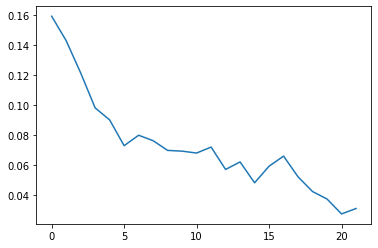

In [26]:
plt.plot(all_vals)

In [6]:
c_autoencer = autoenc(17,5,3)
c_autoencer.autoencoder.compile(optimizer = "nadam",
                                loss = "binary_crossentropy",
                                metrics=[keras.metrics.RootMeanSquaredError()])
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=300,restore_best_weights = True)
hist = c_autoencer.autoencoder.fit(X[tr],X[tr],
                                   validation_data=(X[t],X[t]),
                                   epochs=100000,
                                   callbacks=[callback])

Epoch 1/100000
6/6 [==============================] - 1s 37ms/step - loss: 0.7031 - root_mean_squared_error: 0.3110 - val_loss: 0.6953 - val_root_mean_squared_error: 0.3030
Epoch 2/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.6921 - root_mean_squared_error: 0.3021 - val_loss: 0.6880 - val_root_mean_squared_error: 0.2970
Epoch 3/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.6849 - root_mean_squared_error: 0.2961 - val_loss: 0.6806 - val_root_mean_squared_error: 0.2907
Epoch 4/100000
6/6 [==============================] - 0s 11ms/step - loss: 0.6766 - root_mean_squared_error: 0.2891 - val_loss: 0.6703 - val_root_mean_squared_error: 0.2819
Epoch 5/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.6621 - root_mean_squared_error: 0.2766 - val_loss: 0.6498 - val_root_mean_squared_error: 0.2640
Epoch 6/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.6359 - root_mean_squared_error: 0.2536 - val_loss: 0.6172 - va

6/6 [==============================] - 0s 8ms/step - loss: 0.5165 - root_mean_squared_error: 0.1248 - val_loss: 0.5213 - val_root_mean_squared_error: 0.1296
Epoch 49/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.5163 - root_mean_squared_error: 0.1244 - val_loss: 0.5209 - val_root_mean_squared_error: 0.1288
Epoch 50/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.5160 - root_mean_squared_error: 0.1240 - val_loss: 0.5206 - val_root_mean_squared_error: 0.1285
Epoch 51/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.5159 - root_mean_squared_error: 0.1238 - val_loss: 0.5215 - val_root_mean_squared_error: 0.1301
Epoch 52/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.5157 - root_mean_squared_error: 0.1236 - val_loss: 0.5213 - val_root_mean_squared_error: 0.1296
Epoch 53/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.5156 - root_mean_squared_error: 0.1234 - val_loss: 0.5213 - val_root_mean_

6/6 [==============================] - 0s 5ms/step - loss: 0.4890 - root_mean_squared_error: 0.0669 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0623
Epoch 143/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4887 - root_mean_squared_error: 0.0660 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0632
Epoch 144/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4888 - root_mean_squared_error: 0.0666 - val_loss: 0.4902 - val_root_mean_squared_error: 0.0637
Epoch 145/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4888 - root_mean_squared_error: 0.0663 - val_loss: 0.4897 - val_root_mean_squared_error: 0.0624
Epoch 146/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4885 - root_mean_squared_error: 0.0657 - val_loss: 0.4903 - val_root_mean_squared_error: 0.0644
Epoch 147/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4888 - root_mean_squared_error: 0.0664 - val_loss: 0.4908 - val_root_

6/6 [==============================] - 0s 4ms/step - loss: 0.4875 - root_mean_squared_error: 0.0630 - val_loss: 0.4895 - val_root_mean_squared_error: 0.0620
Epoch 237/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4880 - root_mean_squared_error: 0.0646 - val_loss: 0.4886 - val_root_mean_squared_error: 0.0591
Epoch 238/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4874 - root_mean_squared_error: 0.0628 - val_loss: 0.4886 - val_root_mean_squared_error: 0.0590
Epoch 239/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4873 - root_mean_squared_error: 0.0624 - val_loss: 0.4887 - val_root_mean_squared_error: 0.0594
Epoch 240/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4874 - root_mean_squared_error: 0.0627 - val_loss: 0.4887 - val_root_mean_squared_error: 0.0594
Epoch 241/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4873 - root_mean_squared_error: 0.0625 - val_loss: 0.4886 - val_root_

6/6 [==============================] - 0s 5ms/step - loss: 0.4862 - root_mean_squared_error: 0.0592 - val_loss: 0.4886 - val_root_mean_squared_error: 0.0586
Epoch 331/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4862 - root_mean_squared_error: 0.0592 - val_loss: 0.4883 - val_root_mean_squared_error: 0.0575
Epoch 332/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4861 - root_mean_squared_error: 0.0587 - val_loss: 0.4886 - val_root_mean_squared_error: 0.0585
Epoch 333/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4862 - root_mean_squared_error: 0.0590 - val_loss: 0.4884 - val_root_mean_squared_error: 0.0579
Epoch 334/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4862 - root_mean_squared_error: 0.0592 - val_loss: 0.4883 - val_root_mean_squared_error: 0.0576
Epoch 335/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4861 - root_mean_squared_error: 0.0587 - val_loss: 0.4886 - val_root_

6/6 [==============================] - 0s 4ms/step - loss: 0.4847 - root_mean_squared_error: 0.0545 - val_loss: 0.4884 - val_root_mean_squared_error: 0.0584
Epoch 425/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4846 - root_mean_squared_error: 0.0541 - val_loss: 0.4880 - val_root_mean_squared_error: 0.0573
Epoch 426/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4845 - root_mean_squared_error: 0.0540 - val_loss: 0.4882 - val_root_mean_squared_error: 0.0577
Epoch 427/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4845 - root_mean_squared_error: 0.0538 - val_loss: 0.4887 - val_root_mean_squared_error: 0.0591
Epoch 428/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4847 - root_mean_squared_error: 0.0544 - val_loss: 0.4882 - val_root_mean_squared_error: 0.0579
Epoch 429/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4845 - root_mean_squared_error: 0.0539 - val_loss: 0.4884 - val_root_

6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0531 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0593
Epoch 519/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0531 - val_loss: 0.4894 - val_root_mean_squared_error: 0.0599
Epoch 520/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4844 - root_mean_squared_error: 0.0533 - val_loss: 0.4888 - val_root_mean_squared_error: 0.0589
Epoch 521/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4843 - root_mean_squared_error: 0.0534 - val_loss: 0.4887 - val_root_mean_squared_error: 0.0588
Epoch 522/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4843 - root_mean_squared_error: 0.0531 - val_loss: 0.4881 - val_root_mean_squared_error: 0.0576
Epoch 523/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0532 - val_loss: 0.4884 - val_root_

Epoch 565/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0529 - val_loss: 0.4888 - val_root_mean_squared_error: 0.0587
Epoch 566/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4842 - root_mean_squared_error: 0.0526 - val_loss: 0.4883 - val_root_mean_squared_error: 0.0577
Epoch 567/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4842 - root_mean_squared_error: 0.0526 - val_loss: 0.4888 - val_root_mean_squared_error: 0.0586
Epoch 568/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4843 - root_mean_squared_error: 0.0529 - val_loss: 0.4890 - val_root_mean_squared_error: 0.0595
Epoch 569/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0528 - val_loss: 0.4885 - val_root_mean_squared_error: 0.0580
Epoch 570/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4842 - root_mean_squared_error: 0.0528 - val_loss: 0

Epoch 612/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4842 - root_mean_squared_error: 0.0525 - val_loss: 0.4891 - val_root_mean_squared_error: 0.0586
Epoch 613/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4842 - root_mean_squared_error: 0.0526 - val_loss: 0.4891 - val_root_mean_squared_error: 0.0597
Epoch 614/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4842 - root_mean_squared_error: 0.0529 - val_loss: 0.4890 - val_root_mean_squared_error: 0.0590
Epoch 615/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4842 - root_mean_squared_error: 0.0527 - val_loss: 0.4890 - val_root_mean_squared_error: 0.0590
Epoch 616/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0530 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0598
Epoch 617/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - root_mean_squared_error: 0.0529 - val_loss: 0

6/6 [==============================] - 0s 6ms/step - loss: 0.4841 - root_mean_squared_error: 0.0523 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0588
Epoch 660/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4841 - root_mean_squared_error: 0.0522 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0590
Epoch 661/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4841 - root_mean_squared_error: 0.0523 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0581
Epoch 662/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4841 - root_mean_squared_error: 0.0522 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0587
Epoch 663/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4842 - root_mean_squared_error: 0.0526 - val_loss: 0.4895 - val_root_mean_squared_error: 0.0588
Epoch 664/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4842 - root_mean_squared_error: 0.0525 - val_loss: 0.4898 - val_root_

6/6 [==============================] - 0s 6ms/step - loss: 0.4841 - root_mean_squared_error: 0.0523 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0583
Epoch 754/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4840 - root_mean_squared_error: 0.0520 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0587
Epoch 755/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4841 - root_mean_squared_error: 0.0524 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0583
Epoch 756/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0519 - val_loss: 0.4890 - val_root_mean_squared_error: 0.0585
Epoch 757/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4841 - root_mean_squared_error: 0.0523 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0581
Epoch 758/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - root_mean_squared_error: 0.0519 - val_loss: 0.4901 - val_root_

6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4904 - val_root_mean_squared_error: 0.0581
Epoch 848/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4905 - val_root_mean_squared_error: 0.0585
Epoch 849/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0517 - val_loss: 0.4899 - val_root_mean_squared_error: 0.0581
Epoch 850/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0519 - val_loss: 0.4903 - val_root_mean_squared_error: 0.0584
Epoch 851/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4907 - val_root_mean_squared_error: 0.0589
Epoch 852/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0518 - val_loss: 0.4898 - val_root_

6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4888 - val_root_mean_squared_error: 0.0571
Epoch 942/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4889 - val_root_mean_squared_error: 0.0573
Epoch 943/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0577
Epoch 944/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0575
Epoch 945/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0515 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0578
Epoch 946/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4898 - val_root_

Epoch 1035/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0515
Epoch 1036/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0521 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0506
Epoch 1037/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4839 - root_mean_squared_error: 0.0518 - val_loss: 0.4860 - val_root_mean_squared_error: 0.0503
Epoch 1038/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0518 - val_loss: 0.4860 - val_root_mean_squared_error: 0.0504
Epoch 1039/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0510
Epoch 1040/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0519 - val_l

Epoch 1082/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0513 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0570
Epoch 1083/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0511 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0572
Epoch 1084/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0577
Epoch 1085/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0513 - val_loss: 0.4889 - val_root_mean_squared_error: 0.0573
Epoch 1086/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0513 - val_loss: 0.4884 - val_root_mean_squared_error: 0.0569
Epoch 1087/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4838 - root_mean_squared_error: 0.0515 - val_l

Epoch 1129/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4838 - root_mean_squared_error: 0.0515 - val_loss: 0.4905 - val_root_mean_squared_error: 0.0579
Epoch 1130/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4838 - root_mean_squared_error: 0.0512 - val_loss: 0.4902 - val_root_mean_squared_error: 0.0581
Epoch 1131/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0576
Epoch 1132/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_loss: 0.4902 - val_root_mean_squared_error: 0.0583
Epoch 1133/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4906 - val_root_mean_squared_error: 0.0584
Epoch 1134/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_l

Epoch 1176/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0513 - val_loss: 0.4905 - val_root_mean_squared_error: 0.0574
Epoch 1177/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4838 - root_mean_squared_error: 0.0510 - val_loss: 0.4905 - val_root_mean_squared_error: 0.0575
Epoch 1178/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0512 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0571
Epoch 1179/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0511 - val_loss: 0.4906 - val_root_mean_squared_error: 0.0578
Epoch 1180/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0512 - val_loss: 0.4907 - val_root_mean_squared_error: 0.0584
Epoch 1181/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_l

Epoch 1223/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4911 - val_root_mean_squared_error: 0.0575
Epoch 1224/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4909 - val_root_mean_squared_error: 0.0574
Epoch 1225/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4908 - val_root_mean_squared_error: 0.0573
Epoch 1226/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4908 - val_root_mean_squared_error: 0.0575
Epoch 1227/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4911 - val_root_mean_squared_error: 0.0574
Epoch 1228/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0510 - val_l

Epoch 1270/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_loss: 0.4937 - val_root_mean_squared_error: 0.0608
Epoch 1271/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0510 - val_loss: 0.4904 - val_root_mean_squared_error: 0.0573
Epoch 1272/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4838 - root_mean_squared_error: 0.0512 - val_loss: 0.4899 - val_root_mean_squared_error: 0.0573
Epoch 1273/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0511 - val_loss: 0.4904 - val_root_mean_squared_error: 0.0579
Epoch 1274/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0513 - val_loss: 0.4903 - val_root_mean_squared_error: 0.0576
Epoch 1275/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_l

Epoch 1317/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4902 - val_root_mean_squared_error: 0.0571
Epoch 1318/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4908 - val_root_mean_squared_error: 0.0580
Epoch 1319/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4899 - val_root_mean_squared_error: 0.0573
Epoch 1320/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4902 - val_root_mean_squared_error: 0.0574
Epoch 1321/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0511 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0570
Epoch 1322/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_l

Epoch 1364/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0506 - val_loss: 0.4954 - val_root_mean_squared_error: 0.0627
Epoch 1365/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4889 - root_mean_squared_error: 0.0576 - val_loss: 0.4911 - val_root_mean_squared_error: 0.0606
Epoch 1366/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4845 - root_mean_squared_error: 0.0538 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0510
Epoch 1367/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4845 - root_mean_squared_error: 0.0541 - val_loss: 0.5099 - val_root_mean_squared_error: 0.0756
Epoch 1368/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4885 - root_mean_squared_error: 0.0608 - val_loss: 0.4862 - val_root_mean_squared_error: 0.0513
Epoch 1369/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4854 - root_mean_squared_error: 0.0560 - val_l

Epoch 1411/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4841 - root_mean_squared_error: 0.0524 - val_loss: 0.4858 - val_root_mean_squared_error: 0.0498
Epoch 1412/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4840 - root_mean_squared_error: 0.0523 - val_loss: 0.4859 - val_root_mean_squared_error: 0.0501
Epoch 1413/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4841 - root_mean_squared_error: 0.0523 - val_loss: 0.4858 - val_root_mean_squared_error: 0.0496
Epoch 1414/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4840 - root_mean_squared_error: 0.0523 - val_loss: 0.4859 - val_root_mean_squared_error: 0.0500
Epoch 1415/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - root_mean_squared_error: 0.0522 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0507
Epoch 1416/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4841 - root_mean_squared_error: 0.0523 - val_l

Epoch 1458/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0519 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0493
Epoch 1459/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0488
Epoch 1460/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0492
Epoch 1461/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0518 - val_loss: 0.4858 - val_root_mean_squared_error: 0.0498
Epoch 1462/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0520 - val_loss: 0.4859 - val_root_mean_squared_error: 0.0501
Epoch 1463/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - root_mean_squared_error: 0.0519 - val_l

Epoch 1505/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4858 - val_root_mean_squared_error: 0.0497
Epoch 1506/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4858 - val_root_mean_squared_error: 0.0497
Epoch 1507/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0515 - val_loss: 0.4858 - val_root_mean_squared_error: 0.0495
Epoch 1508/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0493
Epoch 1509/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0490
Epoch 1510/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4838 - root_mean_squared_error: 0.0514 - val_l

Epoch 1552/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0511 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0518
Epoch 1553/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4838 - root_mean_squared_error: 0.0511 - val_loss: 0.4865 - val_root_mean_squared_error: 0.0522
Epoch 1554/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4866 - val_root_mean_squared_error: 0.0530
Epoch 1555/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4869 - val_root_mean_squared_error: 0.0540
Epoch 1556/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4872 - val_root_mean_squared_error: 0.0547
Epoch 1557/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_l

Epoch 1599/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4886 - val_root_mean_squared_error: 0.0561
Epoch 1600/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4885 - val_root_mean_squared_error: 0.0561
Epoch 1601/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4883 - val_root_mean_squared_error: 0.0560
Epoch 1602/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4885 - val_root_mean_squared_error: 0.0563
Epoch 1603/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4888 - val_root_mean_squared_error: 0.0566
Epoch 1604/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_l

Epoch 1646/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0569
Epoch 1647/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0506 - val_loss: 0.4894 - val_root_mean_squared_error: 0.0563
Epoch 1648/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0564
Epoch 1649/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0566
Epoch 1650/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0566
Epoch 1651/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_l

Epoch 1693/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4897 - val_root_mean_squared_error: 0.0568
Epoch 1694/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0509 - val_loss: 0.4895 - val_root_mean_squared_error: 0.0566
Epoch 1695/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4897 - val_root_mean_squared_error: 0.0563
Epoch 1696/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4897 - val_root_mean_squared_error: 0.0565
Epoch 1697/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4899 - val_root_mean_squared_error: 0.0564
Epoch 1698/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_l

Epoch 1740/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4894 - val_root_mean_squared_error: 0.0564
Epoch 1741/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0567
Epoch 1742/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0568
Epoch 1743/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4894 - val_root_mean_squared_error: 0.0567
Epoch 1744/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0565
Epoch 1745/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_l

Epoch 1787/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4895 - val_root_mean_squared_error: 0.0571
Epoch 1788/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4895 - val_root_mean_squared_error: 0.0563
Epoch 1789/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0562
Epoch 1790/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4898 - val_root_mean_squared_error: 0.0569
Epoch 1791/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0564
Epoch 1792/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_l

Epoch 1834/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0562
Epoch 1835/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4899 - val_root_mean_squared_error: 0.0563
Epoch 1836/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4901 - val_root_mean_squared_error: 0.0561
Epoch 1837/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0508 - val_loss: 0.4896 - val_root_mean_squared_error: 0.0562
Epoch 1838/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4894 - val_root_mean_squared_error: 0.0560
Epoch 1839/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_l

Epoch 1881/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4885 - val_root_mean_squared_error: 0.0561
Epoch 1882/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4906 - val_root_mean_squared_error: 0.0563
Epoch 1883/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4900 - val_root_mean_squared_error: 0.0561
Epoch 1884/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0563
Epoch 1885/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4890 - val_root_mean_squared_error: 0.0563
Epoch 1886/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_l

Epoch 1928/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4888 - val_root_mean_squared_error: 0.0558
Epoch 1929/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0564
Epoch 1930/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4889 - val_root_mean_squared_error: 0.0561
Epoch 1931/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4880 - val_root_mean_squared_error: 0.0557
Epoch 1932/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0560
Epoch 1933/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0505 - val_l

Epoch 1975/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4893 - val_root_mean_squared_error: 0.0571
Epoch 1976/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0506 - val_loss: 0.4892 - val_root_mean_squared_error: 0.0560
Epoch 1977/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4894 - val_root_mean_squared_error: 0.0558
Epoch 1978/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4902 - val_root_mean_squared_error: 0.0562
Epoch 1979/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4885 - val_root_mean_squared_error: 0.0560
Epoch 1980/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_l

Epoch 2022/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0518 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0487
Epoch 2023/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0489
Epoch 2024/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - root_mean_squared_error: 0.0521 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0495
Epoch 2025/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0520 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0489
Epoch 2026/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0486
Epoch 2027/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_l

Epoch 2115/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0508
Epoch 2116/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0509
Epoch 2117/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0509
Epoch 2118/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0507
Epoch 2119/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4860 - val_root_mean_squared_error: 0.0505
Epoch 2120/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_l

Epoch 2162/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4859 - val_root_mean_squared_error: 0.0500
Epoch 2163/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_loss: 0.4862 - val_root_mean_squared_error: 0.0512
Epoch 2164/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0524
Epoch 2165/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0519
Epoch 2166/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0521
Epoch 2167/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_l

Epoch 2209/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0540
Epoch 2210/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4869 - val_root_mean_squared_error: 0.0539
Epoch 2211/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0539
Epoch 2212/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4883 - val_root_mean_squared_error: 0.0553
Epoch 2213/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0505 - val_loss: 0.4873 - val_root_mean_squared_error: 0.0549
Epoch 2214/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0506 - val_l

Epoch 2256/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4874 - val_root_mean_squared_error: 0.0546
Epoch 2257/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4865 - val_root_mean_squared_error: 0.0528
Epoch 2258/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0521
Epoch 2259/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4867 - val_root_mean_squared_error: 0.0531
Epoch 2260/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0544
Epoch 2261/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_l

Epoch 2303/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0511 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0479
Epoch 2304/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0511 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0483
Epoch 2305/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0485
Epoch 2306/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0482
Epoch 2307/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0481
Epoch 2308/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_l

Epoch 2350/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4867 - val_root_mean_squared_error: 0.0531
Epoch 2351/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4865 - val_root_mean_squared_error: 0.0524
Epoch 2352/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0517
Epoch 2353/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4865 - val_root_mean_squared_error: 0.0527
Epoch 2354/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0519
Epoch 2355/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_l

Epoch 2397/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4867 - val_root_mean_squared_error: 0.0531
Epoch 2398/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0524
Epoch 2399/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0513
Epoch 2400/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4860 - val_root_mean_squared_error: 0.0508
Epoch 2401/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0510
Epoch 2402/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_l

Epoch 2444/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4840 - root_mean_squared_error: 0.0518 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0486
Epoch 2445/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.0519 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0488
Epoch 2446/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - root_mean_squared_error: 0.0520 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0486
Epoch 2447/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4840 - root_mean_squared_error: 0.0518 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0483
Epoch 2448/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4840 - root_mean_squared_error: 0.0518 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0482
Epoch 2449/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0518 - val_l

Epoch 2491/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0485
Epoch 2492/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0513 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0489
Epoch 2493/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0488
Epoch 2494/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0482
Epoch 2495/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4839 - root_mean_squared_error: 0.0515 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0487
Epoch 2496/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4840 - root_mean_squared_error: 0.0517 - val_l

Epoch 2538/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0512 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0484
Epoch 2539/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0511 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0487
Epoch 2540/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0511 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0478
Epoch 2541/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0478
Epoch 2542/100000
6/6 [==============================] - 0s 3ms/step - loss: 0.4837 - root_mean_squared_error: 0.0510 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0484
Epoch 2543/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_l

Epoch 2585/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0481
Epoch 2586/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0485
Epoch 2587/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0481
Epoch 2588/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0479
Epoch 2589/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0479
Epoch 2590/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_l

Epoch 2632/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0488
Epoch 2633/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0490
Epoch 2634/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0490
Epoch 2635/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0484
Epoch 2636/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4857 - val_root_mean_squared_error: 0.0490
Epoch 2637/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0505 - val_l

Epoch 2679/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4865 - val_root_mean_squared_error: 0.0527
Epoch 2680/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0522
Epoch 2681/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4868 - val_root_mean_squared_error: 0.0536
Epoch 2682/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4866 - val_root_mean_squared_error: 0.0530
Epoch 2683/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4866 - val_root_mean_squared_error: 0.0531
Epoch 2684/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_l

Epoch 2726/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4867 - val_root_mean_squared_error: 0.0532
Epoch 2727/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0539
Epoch 2728/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4869 - val_root_mean_squared_error: 0.0537
Epoch 2729/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0541
Epoch 2730/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0539
Epoch 2731/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_l

Epoch 2773/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4872 - val_root_mean_squared_error: 0.0542
Epoch 2774/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4868 - val_root_mean_squared_error: 0.0533
Epoch 2775/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4867 - val_root_mean_squared_error: 0.0532
Epoch 2776/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4862 - val_root_mean_squared_error: 0.0516
Epoch 2777/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4861 - val_root_mean_squared_error: 0.0507
Epoch 2778/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_l

Epoch 2820/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4872 - val_root_mean_squared_error: 0.0545
Epoch 2821/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4873 - val_root_mean_squared_error: 0.0544
Epoch 2822/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4875 - val_root_mean_squared_error: 0.0546
Epoch 2823/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0539
Epoch 2824/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4835 - root_mean_squared_error: 0.0502 - val_loss: 0.4871 - val_root_mean_squared_error: 0.0541
Epoch 2825/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_l

Epoch 2867/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0517
Epoch 2868/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4868 - val_root_mean_squared_error: 0.0535
Epoch 2869/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4862 - val_root_mean_squared_error: 0.0518
Epoch 2870/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0523
Epoch 2871/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4860 - val_root_mean_squared_error: 0.0504
Epoch 2872/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_l

Epoch 2914/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0520
Epoch 2915/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0525
Epoch 2916/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4862 - val_root_mean_squared_error: 0.0518
Epoch 2917/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4835 - root_mean_squared_error: 0.0503 - val_loss: 0.4865 - val_root_mean_squared_error: 0.0527
Epoch 2918/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4869 - val_root_mean_squared_error: 0.0539
Epoch 2919/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0507 - val_l

Epoch 2961/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4867 - val_root_mean_squared_error: 0.0530
Epoch 2962/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0518
Epoch 2963/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4835 - root_mean_squared_error: 0.0504 - val_loss: 0.4866 - val_root_mean_squared_error: 0.0529
Epoch 2964/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0503 - val_loss: 0.4863 - val_root_mean_squared_error: 0.0521
Epoch 2965/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4835 - root_mean_squared_error: 0.0502 - val_loss: 0.4870 - val_root_mean_squared_error: 0.0539
Epoch 2966/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_l

Epoch 3054/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4864 - val_root_mean_squared_error: 0.0520
Epoch 3055/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4862 - val_root_mean_squared_error: 0.0511
Epoch 3056/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4859 - val_root_mean_squared_error: 0.0497
Epoch 3057/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - root_mean_squared_error: 0.0504 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0487
Epoch 3058/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0504 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0487
Epoch 3059/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0502 - val_l

Epoch 3101/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0479
Epoch 3102/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0482
Epoch 3103/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0478
Epoch 3104/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0508 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0478
Epoch 3105/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0508 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0484
Epoch 3106/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_l

Epoch 3148/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4860 - root_mean_squared_error: 0.0565 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0484
Epoch 3149/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4841 - root_mean_squared_error: 0.0521 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0486
Epoch 3150/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4842 - root_mean_squared_error: 0.0527 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0486
Epoch 3151/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4840 - root_mean_squared_error: 0.0520 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0489
Epoch 3152/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4840 - root_mean_squared_error: 0.0520 - val_loss: 0.4856 - val_root_mean_squared_error: 0.0487
Epoch 3153/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4840 - root_mean_squared_error: 0.0521 - val_l

Epoch 3195/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0514 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0475
Epoch 3196/100000
6/6 [==============================] - 0s 7ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0481
Epoch 3197/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0515 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0485
Epoch 3198/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0517 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0482
Epoch 3199/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4839 - root_mean_squared_error: 0.0515 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0479
Epoch 3200/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.0516 - val_l

Epoch 3242/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4838 - root_mean_squared_error: 0.0510 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0480
Epoch 3243/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0511 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0481
Epoch 3244/100000
6/6 [==============================] - 0s 9ms/step - loss: 0.4838 - root_mean_squared_error: 0.0510 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0478
Epoch 3245/100000
6/6 [==============================] - 0s 8ms/step - loss: 0.4838 - root_mean_squared_error: 0.0510 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0482
Epoch 3246/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4838 - root_mean_squared_error: 0.0511 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0483
Epoch 3247/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0509 - val_l

Epoch 3289/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4837 - root_mean_squared_error: 0.0508 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0475
Epoch 3290/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0479
Epoch 3291/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4855 - val_root_mean_squared_error: 0.0482
Epoch 3292/100000
6/6 [==============================] - 0s 6ms/step - loss: 0.4837 - root_mean_squared_error: 0.0507 - val_loss: 0.4854 - val_root_mean_squared_error: 0.0477
Epoch 3293/100000
6/6 [==============================] - 0s 5ms/step - loss: 0.4836 - root_mean_squared_error: 0.0505 - val_loss: 0.4853 - val_root_mean_squared_error: 0.0477
Epoch 3294/100000
6/6 [==============================] - 0s 4ms/step - loss: 0.4836 - root_mean_squared_error: 0.0506 - val_l

In [7]:
encoded = c_autoencer.encoder.predict(X)
encoded.shape

(239, 5)

In [8]:
np.save("Data/Numpy/AutoEncoded.npy",encoded)

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = [
    {"kernel":["linear","rbf","sigmoid"],
     "probability":[True],"class_weight":[None,"balanced"],
     "gamma":['scale','auto'],"C":[a for a in np.arange(1.0,0.1,-0.1)]},
    {"kernel":["poly"],"probability":[True],"class_weight":[None,"balanced"],"degree":[2,3,4],
     "gamma":['scale','auto'],"C":[a for a in np.arange(1.0,0.1,-0.1)]}
]
svc = SVC()
clf = GridSearchCV(svc,params,scoring="recall",cv=20)
clf.fit(encoded[tr],y[tr])
clf.best_score_

0.7

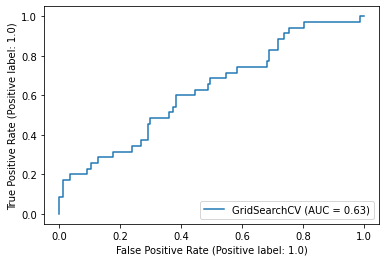

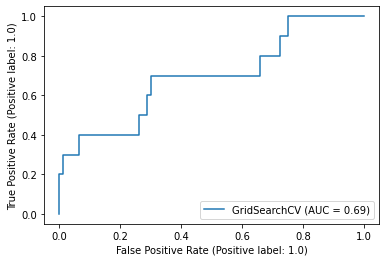

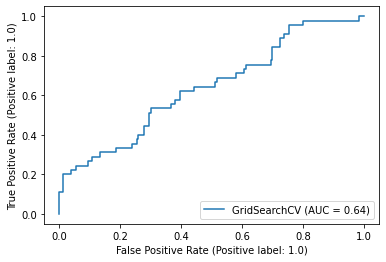

In [38]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,encoded[tr],y[tr])
plot_roc_curve(clf,encoded[t],y[t])
plot_roc_curve(clf,encoded,y)

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight="balanced")
clf.fit(encoded[tr],y[tr])
pred = clf.predict(encoded[t])
get_sens_spec(y[t],pred)

[0.9, 0.6447368421052632, 0.6744186046511628]

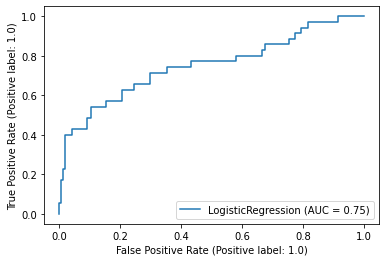

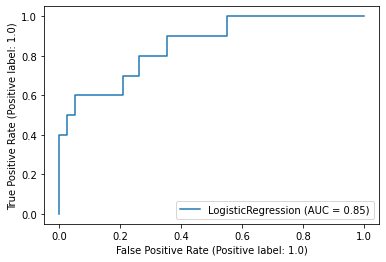

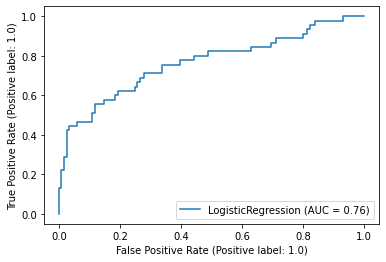

In [40]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,encoded[tr],y[tr])
plot_roc_curve(clf,encoded[t],y[t])
plot_roc_curve(clf,encoded,y)

In [23]:
from tqdm.notebook import tqdm
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

def do_loocv():
    params = {
        "criterion":["gini","entropy"],
        "splitter":["best","random"],
        "max_depth":[None,1,2,3,4,5,6,7],
        "max_features":[1,2,3,4,5],
        "ccp_alpha":[0.1,0.01,0.001,0.0001,0]
    }
    dtc = DecisionTreeClassifier(class_weight="balanced")
    clf = GridSearchCV(dtc,params,scoring="recall",cv=LeaveOneOut())
    clf.fit(encoded[tr],y[tr])
    return clf.best_score_

perfs = []

for a in tqdm(range(100)):
    perfs.append(do_loocv())
    print(perfs[a])

  0%|          | 0/100 [00:00<?, ?it/s]

0.16080402010050251
0.16080402010050251
0.16080402010050251


KeyboardInterrupt: 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

params = {
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None,1,2,3,4,5,6,7],
    "max_features":[1,2,3,4,5],
    "ccp_alpha":[0.1,0.01,0.001,0.0001,0]
}
dtc = DecisionTreeClassifier(class_weight="balanced")
clf = GridSearchCV(dtc,params,scoring="recall",cv=20)
clf.fit(encoded[tr],y[tr])
clf.best_score_

0.95

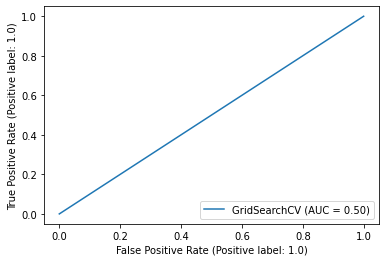

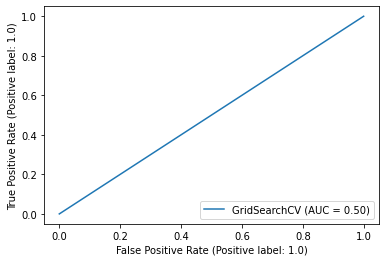

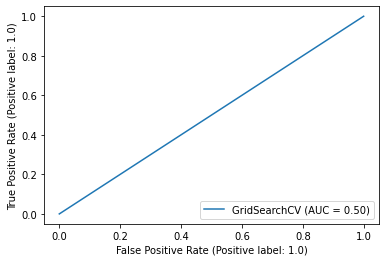

In [42]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,encoded[tr],y[tr])
plot_roc_curve(clf,encoded[t],y[t])
plot_roc_curve(clf,encoded,y)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "p":[1,2,3]
}
dtc = KNeighborsClassifier()
clf = GridSearchCV(dtc,params,scoring="recall",cv=20)
clf.fit(encoded[tr],y[tr])
clf.best_score_

0.55

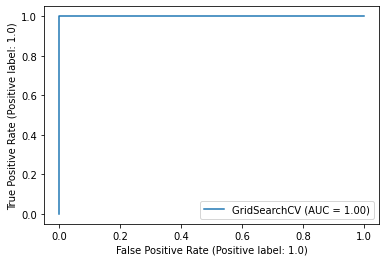

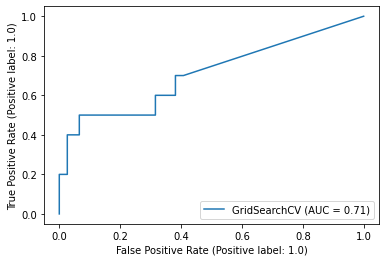

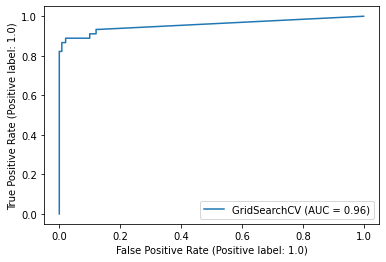

In [44]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,encoded[tr],y[tr])
plot_roc_curve(clf,encoded[t],y[t])
plot_roc_curve(clf,encoded,y)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":["gini","entropy"],
    "max_depth":[None,1,2,3,4,5],
    "max_features":[None,1,2,3,4,5],
    "bootstrap":[True],
    "class_weight":[None,"balanced","balanced_subsample"],
    "ccp_alpha":[0.1,0.01,0.001,0.0001]
}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,params,n_jobs=12,scoring="recall",cv=20)
clf.fit(encoded[tr],y[tr])
clf.best_score_

0.6

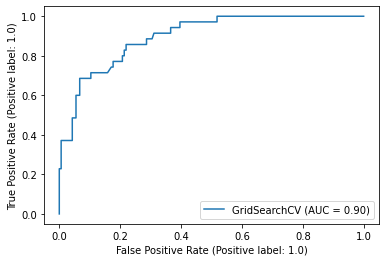

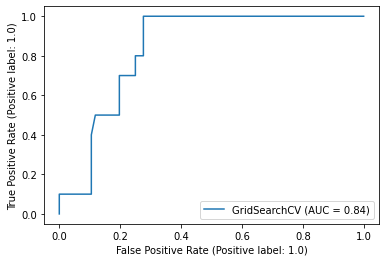

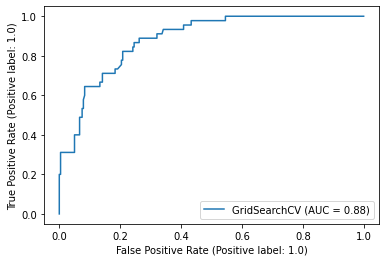

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,encoded[tr],y[tr])
plot_roc_curve(clf,encoded[t],y[t])
plot_roc_curve(clf,encoded,y)